In [55]:
#data import
from skimage.io import imread
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#gpu import
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

#model imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.metrics import mean_squared_error

In [56]:
#setup GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

Num GPUs Available:  1


C:\Users\Marcel\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [57]:
#image processing function
IMG_H = int(170/3)
IMG_W = int(432/3)
#IMG_D = 3
def preprocessImg(img):
    img = img[70:240,0:432] #170,432,3
    h,w,d = img.shape
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.resize(img,(int(w/3),int(h/3)))
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = img/255.0
    return img

In [58]:
#read in pandas data
#1. read in full data
steeringDataAll = pd.read_csv('bigLeft/labeled_data.csv',header=None)
steeringData = steeringDataAll[:71000]
test_data = steeringDataAll[71000:]

In [59]:
steeringData = steeringData.drop(steeringData.columns[1:2],axis=1)
steeringData

,0,2
0,ul73gz91imu2dfwkprosoq2s7c,0.00
1,6hq4npf76i8yeqtk3uprm9svuu,0.00
2,wloqxmunrs1pvvb4eczaxottxa,0.00
3,lwoo87pp5mipx49ghwju6bil2f,0.00
4,zlhnqey8qc5d75qyvsr14n7qfe,0.00
...,...,...
70995,ss5uve7hzosl89ypr96zt87ehc,-1.00
70996,rmb2fzx9aqeslabf7agsqlseap,-0.98
70997,wr1jtsmlp49ca8z5bft6n9hhod,-0.92
70998,i5tqh4olb8v4fqrcu6jsrnynmp,-0.84


In [60]:
#above -0.50 will be set to 0
ct_before = 0
for i in steeringData[2]:
    if i == 0.0:
        #append image name + steering
        ct_before += 1
        
print(ct_before)

12426


In [61]:
final_ct = 12426
start_ct_s = 0
start_ct_t = 0
arr = []
for row in steeringData.itertuples():
    if row[2] == 0.0 and start_ct_s != final_ct:
        #append
        temp = [row[1],row[2]]
        arr.append(temp)
        start_ct_s += 1
    if row[2] < 0.0 and start_ct_t != final_ct:
        #append
        temp = [row[1],row[2]]
        arr.append(temp)
        start_ct_t += 1
len(arr)

24852

In [64]:
for i in arr:
    print(i[0])

ul73gz91imu2dfwkprosoq2s7c
6hq4npf76i8yeqtk3uprm9svuu
wloqxmunrs1pvvb4eczaxottxa
lwoo87pp5mipx49ghwju6bil2f
zlhnqey8qc5d75qyvsr14n7qfe
6afdbur35yp1zmswkjgkv155tc
jda8kg5kvt4jgb33mrotf2rift
v2ms3rxwzgbzkqoimvb6v4hyww
mf6b5tzz5e428xbvxhxmvk6wzi
hgjnpbhrmeo74iup8ccsqijldf
5uck67vrg3hnoocdoqy78bll6g
8nba5re1r1txnxeuehwmnildmv
5w2zfz6ez1q5ehktwheni1o9dd
zdkw9xkifjxvsn3meczu7rkcck
7zoz5yytqgmenl5q1cjgdb72wo
8b7k5u5ybrqregquz1larsd5hz
i8cu3aeoe65lruiwh1vfrvyhtp
2p8e2dqd9og55l5d3nxuhns1zo
l8np4y1xe3fsj1m8b7akodm7ws
anffq99h7kzztf2ehjjmm4iupz
8m95fkmmzbraw97ehe6cv2bxbn
y9hbh18bppj5tiwkizs1cbv63o
fekv4xxi1n1n2umguq4j32oh6l
owwsfcvhjljo8dzyukx9dghkng
znzt67fvqy2os78x17besylrxx
fpmy16zdaot2akfu3a9ezon1sp
dyo3czsgpb4nf2tbdpudrzf8xz
ygp35eama9god34qyuzsw19i8a
6g9b9i3ekunglki9hb5bvxpd9m
b8mpj1uvy14nbn7haqydi9c2oo
g2sm8qz9nia5nwtid8e4yyv3ch
r4y5zkz1y26ldf24e2tik6zgpc
ngucfomd4f66exczow65luti6d
e7efp3xadibl3mjuwm7ameco1n
ggnym1rxmrzmq9uza3s8nv5brk
87fgy4wpub95qp3ri56ne7q7bp
kbrc1rnre3422ctlrqlxledoiw
4

8pks3yt8s8tdw4k4fgq6b7fltq
qb6mijza2r7sk7gmj4ytrsyher
e1thyxaiyxisgo9bnvz2du7ggr
ojc3899htbpf9g9tkqmn9qovhj
fn4mq6xfx1dn1jiwl3zbshbnpz
5y6tbs3e7dwt8zy6qocamg969f
fkwebs1fb3arymjawjxierg62q
6yh4zpc5nkfzg8soafyy2dg8mt
2arh51urlk7xxq3vepj1u2aedd
buffqc6o5kwcle9mxv1rpy39ib
ztsmnj3ihmfkgxftnv2hteutbf
dalk1hsu5tsch3vkbro448y9dq
t4fa57pa8yc5la2wdoipubsi4g
aup26u4cv6557pcqa9f7ojxfhi
gcxkfac6anrm7so31h9k3cih1z
qous2q4k64zbesjhvn7uwrje9i
lsqva35a6m3wh11yv2d5q5as5s
fxqac1gtvcg8zipvp748u76ami
jfz3obyjewsnnu6974jg85czqw
qvrf7upe84zspqfjf4bjw5isoc
nuctlhm9717kg9op2qv1rfy58i
1puzankj5xi6827tznbbv73fxp
l4ki9otp3c8x2uyyeboavrgjcd
fgtitqfq5b7lg99pdgv7f8nzya
c8pijuy1sraqxav3m6nbnzeh5f
711zhyr25mdv7u45ibh6zgfdpl
b9ht41ebzgsf9agjmdf65or7do
j4cng9b25jnvo8aqep61zpmyjd
38mw5r39vq3qyod4s97rvddtnm
kud9gri973i6ln6ld7a14spazz
3ldeyiyoj38mmkilvpmvagsu3z
yi289wk9se9lc2p4wurqzrqc4v
dohpg3zzss1tu3i6g9lphmmrvp
r5gnq1y3g9m73x3dyhlgjf66hr
v71homhvf94i4tf4sz27acp7pq
3a1999y3wlensoawf5osypav6c
2nxdtweioqdl5txbc16di4kjza
y

d5mr6kma6utr8lbichjfim1fam
93kl336j5a5du3ofmk1jp7li9a
psy87klnj25foh3yo519pwsbti
16mahye8ri4pmxxv49q35c5ufy
a2rlywwwm5n2jq95vld16ermdc
la23e33j6u97epkbmnl3q6868c
gc7exocvjhrprlvepcnv3octiv
cufad7kzgs9423xr4xxl6pm5vl
vpokvmgc84rqkzd461ch45qk9l
yv2slkxtzgq8fd4ipkvcfgljwz
sx3z9b7sbo1c2xp4rqde1ra4jh
8sxx9wfdl6zca4znexe6pekvyu
ndppmwsuyajybheejaj7rqum3k
e8ngtdo1l7aq2i5cwxzpfacvqi
599bdwb6g2hhrryoyf7f1wpw8m
6g7kn7jjwre1b8ucm2ar2v719c
ptlzj7f3ru9vyx4b7qscd398pq
zvybj736tionj8vpswcn7l2dfz
5uzsnxl4wjws1a7ozmgm7rm5tw
onocjkp3sxziczbc9ln6bwa29s
mgkz9mzr7zav19wxyerxinr8ug
rmmpl5hfhs5t1snerjunx84xnp
4lmslrdwokjo4nccafxpxzkvfa
51t5i7xz12gyghajr3m81t1efe
ozzly3bd6fnv1dmcwtdqlyxetv
vjl6nmfxluw3uofzefmbm3wq3y
721zxwg1ieo7e87vu9fsdrh5xo
woonu8dlg4kzq5esui97xazlai
l28l367vc6njiwnsck5abri4nq
9wkwx1kcx6wp6ust1roofqlvot
r93jq1668ixl6xeuxz9o5iijbm
in73alo2nqsyww17g3m9iehyxc
zqtk6omvpsa4zbkx5epl1m5jhx
zadun7yp8b5sn52o9l4r2q1shl
usa8psyoq39ltly96opmoyitsf
fodwvbxvt7qcxw7sj9aqxn8wrl
6buhxjm1a1firzvi2k6zqifofn
a

nd5edylnn93wmz7rjl2spowyrz
xj4f9pcl9hldou9fghcwxab55h
l7usi93edkxx7vbdu5wz3pe6iv
jdbzei24ebhs89lu8kzo7ud1ez
gr8n27lxbnu9ghwtsthdtsakhe
mcsu1ze7sqqtda2l74ix5h16xb
caiijxqh1163lcuzk6pe6lasop
iph462m9zznq99pf7ptxy28z8s
dumzjjh6hcsxesapygfq4dw3cd
bkvxkqc9licm8wg9d2a8t6rwzc
jpex5d6lo6xjcurtwcdxyzalur
k2mhtiiehstdqzxgn6jbs98w7n
9f8trzroh83nrzdbu9lbyckppg
nsy3fk62jr1ococbvp2fi5c2rg
i91go7hgbeeledgkb7j2q2euxc
g2ga1ynq6cykj96h7rqi4816lo
of2bfjadwi37cpjyxr7slvxjth
ajl95zxf1xeal8bvoa9sybugak
f1ghehm6jd7qgvt3tfwdq9p8op
mq9uichvxsshd43luz16z8xitc
q34jozx5dps242pdhxgilbbmww
99yl73k7slem1nv4plwks82kam
g33ktmovyshrh86ckm11ufrveu
fa8xdd6gs1oiwnnjdoyyewcrci
r62c2fq9jzbnelp59kwtyygsfz
nmvmgfyssv5e6ovkgvfjdjvu4i
eqnsuwziblj9ui5byxyfxe4jwo
qeey1jtq4jzh9lxk2jbx2dq9rn
laeooas8rfg79uoxku4aa6m3nj
nwiu79wzmjwqb45k5oyxy9y94n
hrkrgb2ueitikpyl734dd2xmqa
2z7ubnqhbmjjhmps1p9ffqdevx
z2elcih6vlpcrsgtacl6chchns
smpvn2zesbpzbnnav5ilp2xklb
xw3nstmdk9bkyrsi6y7lg6sgro
t2z2w5eujzhzc828atxqg7bsuz
f175jt3x136rtwfz4qnclvqt8g
z

kvjy22onb27dxoqgn3dcgrkgit
ugrek594e9vrvbhunwh5bhbbol
bnx1n4xtbgaq7gc4twib4stcbq
d587e3zi73epoleglxlxqjf5fs
pqokqsaijr5dmc8ro5voec5wst
nhd4e8y8eyywga86bhww5bvt2i
iwdhnllda6j9pdxx9uqfof6p9u
deiiwcxyfvy5k9rnjybjnzmjvh
mkn1dc47g7rpoev3n81k7p4ltu
nsldqr3gbhvqp9kg19fa45mhds
ucj4frnlxt8bhhxysq6yxptpvy
i3gahfivxekaaewqrc7mouc9pg
45p9qgqfa3ru1ic8uvma6uvmzj
q3a45rqs28kw3e7t5kq3pjqzgg
u1bpuzgdr21vec6ndugc1su3sq
y1j1tie6rlx3zgy22c36fd7kvu
29c31ezhxhlcetei6h9tgh1fsk
zxnh2698sckuitbq4sp16t1lvh
2j8bazn3pba5z4bq32wcpu6w5f
obb2jepqcj31yi2yviu5rnkczg
pdvfzjkxm1zab5vdnd7pd41dii
xfq2m92e3ayj993vgnrr8qj4cw
a85m7we562nao4k52eq3rivobj
osoyl95ew8e9wkavvyb5jhaj5d
k34uyh3csqtdfh5n1withqt3uq
phzr74fsq9vlytdi6ubqwysutl
nx5wbie92w7ozldfp1i67w6hnw
i82n12fokqr4oirsmqo1o3gowf
vxpsjpuyij6ky7irc7a2ixgynq
542a8jblvas7ia3bii96ic76ml
bl2g79ngcrjlukf9yxg7jv3q7g
y31naxby24ftsvkf7tbn6xverb
nj5bl1anew2ybu17ka836x9cru
kd5frala21e3ynq5ryjmwqnngs
dhpe5cnhu1h9tmwbopcozs7t9b
vetqhacvagcp416qmmhe1k57qt
q8gl58drz54lxeuy8vo3acoi6i
p

osqspr8sygoaoea2b4m6x36wzr
n6sz31ivajxkgodhzkucgxgpbm
yf9w19lvsg4deqjmj6cx5i3swe
rto8pibgg4qrk268m7i9uwa9eb
fami6koj8z9vye27paajjypk4e
x14kervet5iqcnszvljquzpv3v
chiq88e3xg69prnux8wzcg5ajr
7kscua4rgkye1mulbsl5594k9o
dkzjfbjmmvok74apj7nc66t9zx
5ouhaltnmaf8gng4arxggfqcft
jv6wpm4wzurjiyjkrev5oadktd
hanflqbmog9xvdww8vz1oau5yn
8ixg4gy1uxnoxdzexe4r5is8cj
ao1ummbv8qwf8rrwu8jkeoe6bx
oyrpf1nqqant6t8khzflljuyxi
ztclnl9k1vzwbb8qjdnumf6hzu
7wrsq5549s7dwbf5n8okfazkqu
qy6iy4ypycbz34ilhavwnp7fyc
efrus517hynau4itjp2lnrlo2a
fg88p4kcwqxj928epof672w7ix
8avippc7xcsxb2ivdodxmc8okd
kitj8xghchbx3eoac39e362j7x
gsynljb3d2ctliz9jnfnsepu2l
upcd7uz1umruj8oyx7w6geslvt
vml1krgy7rvmgy2kocmr9ptccz
s147t5l9j2tg3r8avgontw6qdh
7pw86m7eup9uy2wuhthw524d4c
f1iuilmhuwx9foa4bqi7rz68vm
787jymhjw13bfswbmk8apiv9yu
h42t7chfn4yw7o6v991ra83a6l
3pphsqdwzlipmqppszbpq8weje
wxnz3h3pzuvc3l27tv2d5ek69g
9on4uu4i8hwmzax45dod6vdghn
qnsq6u2dfhjc2f1j4npyz47pxx
xcrvu6bfgrilj9zbpmovjz9i2m
gty3fnh9iakvtdjk1etdudfzrs
2tl98kp3ai9hy7945yk7pbj4ft
s

In [65]:
#read in images to array + preprocess
dataDir = 'bigLeft/frames/'
dataFormat = '.jpg'
dataImages = []
for i in arr:
    img = imread('{}{}{}'.format(dataDir,i[0],dataFormat), as_gray=False)
    img = preprocessImg(img)
    dataImages.append(img)

In [68]:
output = []
for i in arr:
    output.append(i[1])
output

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [69]:
X = np.array(dataImages).reshape(-1,IMG_H,IMG_W,3)

In [71]:
output = np.array(output)

In [74]:
resnet = ResNet50V2(weights='imagenet', include_top=False,input_shape=X.shape[1:])

for layer in resnet.layers[:-4]:
    layer.trainable = False
    
def nvidia_model():
  model = tf.keras.Sequential()
  model.add(resnet)
    
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  
  model.add(Dense(100, activation='elu'))
  model.add(Dropout(0.5))

  model.add(Dense(50, activation='elu'))
  model.add(Dropout(0.5))


  model.add(Dense(10, activation='elu'))
  model.add(Dropout(0.5))


  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer, metrics=[mean_squared_error])
  return model
resnet1 = nvidia_model()

hist = resnet1.fit(X,output,epochs=20,batch_size=512, validation_split=0.1,verbose=1,shuffle=1)

Epoch 1/20
44/44 [==============================] - 8s 138ms/step - loss: 10.2626 - mean_squared_error: 10.2626 - val_loss: 0.1846 - val_mean_squared_error: 0.1846
Epoch 2/20
44/44 [==============================] - 5s 123ms/step - loss: 2.8521 - mean_squared_error: 2.8521 - val_loss: 0.0888 - val_mean_squared_error: 0.0888
Epoch 3/20
44/44 [==============================] - 5s 123ms/step - loss: 1.9801 - mean_squared_error: 1.9801 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 4/20
44/44 [==============================] - 5s 123ms/step - loss: 1.5499 - mean_squared_error: 1.5499 - val_loss: 0.0658 - val_mean_squared_error: 0.0658
Epoch 5/20
44/44 [==============================] - 5s 124ms/step - loss: 1.3292 - mean_squared_error: 1.3292 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 6/20
44/44 [==============================] - 5s 124ms/step - loss: 1.1552 - mean_squared_error: 1.1552 - val_loss: 0.0600 - val_mean_squared_error: 0.0600
Epoch 7/20
44/44 [========

Text(0.5, 0, 'Epoch')

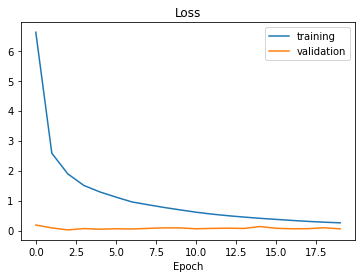

In [75]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [77]:
def preprocessPredImg(img):
    img = img[70:240,0:432] #170,432,3
    h,w,d = img.shape
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.resize(img,(int(w/3),int(h/3)))
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = img/255.0
    return img.reshape(-1,IMG_H,IMG_W,3)

In [78]:
inc = 71000
for i in test_data[0]:
    testImage = imread('{}{}{}'.format(dataDir,i,dataFormat), as_gray=False)
    p = resnet1.predict([preprocessPredImg(testImage)])
    print("Number: {} Prediction value: {:.3f} Actual Value: {}".format(inc,p[0][0],test_data[2][inc]))
    inc+=1

Number: 71000 Prediction value: -0.414 Actual Value: -0.68
Number: 71001 Prediction value: -0.414 Actual Value: -0.61
Number: 71002 Prediction value: -0.414 Actual Value: -0.48
Number: 71003 Prediction value: -0.414 Actual Value: -0.28
Number: 71004 Prediction value: -0.414 Actual Value: -0.02
Number: 71005 Prediction value: -0.414 Actual Value: 0.06
Number: 71006 Prediction value: -0.414 Actual Value: 0.0
Number: 71007 Prediction value: -0.414 Actual Value: 0.0
Number: 71008 Prediction value: -0.336 Actual Value: 0.0
Number: 71009 Prediction value: -0.336 Actual Value: 0.0
Number: 71010 Prediction value: -0.336 Actual Value: 0.0
Number: 71011 Prediction value: -0.336 Actual Value: 0.0
Number: 71012 Prediction value: -0.336 Actual Value: 0.0
Number: 71013 Prediction value: -0.336 Actual Value: 0.0
Number: 71014 Prediction value: -0.336 Actual Value: 0.0
Number: 71015 Prediction value: -0.336 Actual Value: 0.0
Number: 71016 Prediction value: -0.336 Actual Value: 0.0
Number: 71017 Predic

Number: 71144 Prediction value: -0.689 Actual Value: -1.0
Number: 71145 Prediction value: -0.689 Actual Value: -1.0
Number: 71146 Prediction value: -0.689 Actual Value: -1.0
Number: 71147 Prediction value: -0.689 Actual Value: -1.0
Number: 71148 Prediction value: -0.689 Actual Value: -1.0
Number: 71149 Prediction value: -0.689 Actual Value: -1.0
Number: 71150 Prediction value: -0.689 Actual Value: -1.0
Number: 71151 Prediction value: -0.689 Actual Value: -1.0
Number: 71152 Prediction value: -0.689 Actual Value: -1.0
Number: 71153 Prediction value: -0.689 Actual Value: -1.0
Number: 71154 Prediction value: -0.689 Actual Value: -1.0
Number: 71155 Prediction value: -0.736 Actual Value: -1.0
Number: 71156 Prediction value: -0.736 Actual Value: -1.0
Number: 71157 Prediction value: -0.736 Actual Value: -1.0
Number: 71158 Prediction value: -0.736 Actual Value: -1.0
Number: 71159 Prediction value: -0.736 Actual Value: -1.0
Number: 71160 Prediction value: -0.736 Actual Value: -1.0
Number: 71161 

Number: 71288 Prediction value: -0.788 Actual Value: -1.0
Number: 71289 Prediction value: -0.788 Actual Value: -1.0
Number: 71290 Prediction value: -0.788 Actual Value: -1.0
Number: 71291 Prediction value: -0.788 Actual Value: -1.0
Number: 71292 Prediction value: -0.788 Actual Value: -1.0
Number: 71293 Prediction value: -0.788 Actual Value: -1.0
Number: 71294 Prediction value: -0.788 Actual Value: -1.0
Number: 71295 Prediction value: -0.788 Actual Value: -1.0
Number: 71296 Prediction value: -0.788 Actual Value: -1.0
Number: 71297 Prediction value: -0.788 Actual Value: -1.0
Number: 71298 Prediction value: -0.788 Actual Value: -1.0
Number: 71299 Prediction value: -0.788 Actual Value: -1.0
Number: 71300 Prediction value: -0.770 Actual Value: -1.0
Number: 71301 Prediction value: -0.770 Actual Value: -1.0
Number: 71302 Prediction value: -0.770 Actual Value: -1.0
Number: 71303 Prediction value: -0.770 Actual Value: -1.0
Number: 71304 Prediction value: -0.770 Actual Value: -1.0
Number: 71305 

Number: 71432 Prediction value: -0.769 Actual Value: -1.0
Number: 71433 Prediction value: -0.769 Actual Value: -1.0
Number: 71434 Prediction value: -0.769 Actual Value: -1.0
Number: 71435 Prediction value: -0.809 Actual Value: -1.0
Number: 71436 Prediction value: -0.809 Actual Value: -1.0
Number: 71437 Prediction value: -0.809 Actual Value: -1.0
Number: 71438 Prediction value: -0.809 Actual Value: -1.0
Number: 71439 Prediction value: -0.809 Actual Value: -1.0
Number: 71440 Prediction value: -0.809 Actual Value: -1.0
Number: 71441 Prediction value: -0.809 Actual Value: -1.0
Number: 71442 Prediction value: -0.809 Actual Value: -1.0
Number: 71443 Prediction value: -0.809 Actual Value: -1.0
Number: 71444 Prediction value: -0.809 Actual Value: -1.0
Number: 71445 Prediction value: -0.809 Actual Value: -1.0
Number: 71446 Prediction value: -0.809 Actual Value: -1.0
Number: 71447 Prediction value: -0.809 Actual Value: -1.0
Number: 71448 Prediction value: -0.811 Actual Value: -1.0
Number: 71449 

Number: 71576 Prediction value: -0.870 Actual Value: -1.0
Number: 71577 Prediction value: -0.870 Actual Value: -1.0
Number: 71578 Prediction value: -0.866 Actual Value: -1.0
Number: 71579 Prediction value: -0.866 Actual Value: -1.0
Number: 71580 Prediction value: -0.866 Actual Value: -1.0
Number: 71581 Prediction value: -0.866 Actual Value: -1.0
Number: 71582 Prediction value: -0.866 Actual Value: -1.0
Number: 71583 Prediction value: -0.866 Actual Value: -1.0
Number: 71584 Prediction value: -0.866 Actual Value: -1.0
Number: 71585 Prediction value: -0.866 Actual Value: -1.0
Number: 71586 Prediction value: -0.866 Actual Value: -1.0
Number: 71587 Prediction value: -0.866 Actual Value: -1.0
Number: 71588 Prediction value: -0.866 Actual Value: -1.0
Number: 71589 Prediction value: -0.866 Actual Value: -1.0
Number: 71590 Prediction value: -0.866 Actual Value: -1.0
Number: 71591 Prediction value: -0.802 Actual Value: -1.0
Number: 71592 Prediction value: -0.802 Actual Value: -1.0
Number: 71593 

Number: 71720 Prediction value: -0.122 Actual Value: 0.0
Number: 71721 Prediction value: -0.160 Actual Value: 0.04
Number: 71722 Prediction value: -0.160 Actual Value: 0.0
Number: 71723 Prediction value: -0.160 Actual Value: 0.0
Number: 71724 Prediction value: -0.160 Actual Value: 0.0
Number: 71725 Prediction value: -0.160 Actual Value: 0.0
Number: 71726 Prediction value: -0.160 Actual Value: 0.0
Number: 71727 Prediction value: -0.160 Actual Value: 0.0
Number: 71728 Prediction value: -0.111 Actual Value: 0.0
Number: 71729 Prediction value: -0.111 Actual Value: 0.0
Number: 71730 Prediction value: -0.111 Actual Value: 0.0
Number: 71731 Prediction value: -0.111 Actual Value: 0.0
Number: 71732 Prediction value: -0.111 Actual Value: 0.0
Number: 71733 Prediction value: -0.111 Actual Value: 0.0
Number: 71734 Prediction value: -0.111 Actual Value: 0.0
Number: 71735 Prediction value: -0.111 Actual Value: 0.0
Number: 71736 Prediction value: -0.275 Actual Value: 0.0
Number: 71737 Prediction value

Number: 71865 Prediction value: -0.760 Actual Value: -1.0
Number: 71866 Prediction value: -0.760 Actual Value: -1.0
Number: 71867 Prediction value: -0.760 Actual Value: -1.0
Number: 71868 Prediction value: -0.760 Actual Value: -1.0
Number: 71869 Prediction value: -0.760 Actual Value: -1.0
Number: 71870 Prediction value: -0.766 Actual Value: -1.0
Number: 71871 Prediction value: -0.766 Actual Value: -1.0
Number: 71872 Prediction value: -0.766 Actual Value: -1.0
Number: 71873 Prediction value: -0.766 Actual Value: -1.0
Number: 71874 Prediction value: -0.766 Actual Value: -1.0
Number: 71875 Prediction value: -0.766 Actual Value: -1.0
Number: 71876 Prediction value: -0.766 Actual Value: -1.0
Number: 71877 Prediction value: -0.766 Actual Value: -1.0
Number: 71878 Prediction value: -0.764 Actual Value: -1.0
Number: 71879 Prediction value: -0.764 Actual Value: -1.0
Number: 71880 Prediction value: -0.764 Actual Value: -1.0
Number: 71881 Prediction value: -0.764 Actual Value: -1.0
Number: 71882 

Number: 72009 Prediction value: -0.809 Actual Value: -1.0
Number: 72010 Prediction value: -0.809 Actual Value: -1.0
Number: 72011 Prediction value: -0.809 Actual Value: -1.0
Number: 72012 Prediction value: -0.809 Actual Value: -1.0
Number: 72013 Prediction value: -0.809 Actual Value: -1.0
Number: 72014 Prediction value: -0.809 Actual Value: -1.0
Number: 72015 Prediction value: -0.809 Actual Value: -1.0
Number: 72016 Prediction value: -0.809 Actual Value: -1.0
Number: 72017 Prediction value: -0.809 Actual Value: -1.0
Number: 72018 Prediction value: -0.809 Actual Value: -1.0
Number: 72019 Prediction value: -0.809 Actual Value: -1.0
Number: 72020 Prediction value: -0.809 Actual Value: -1.0
Number: 72021 Prediction value: -0.809 Actual Value: -1.0
Number: 72022 Prediction value: -0.809 Actual Value: -1.0
Number: 72023 Prediction value: -0.809 Actual Value: -1.0
Number: 72024 Prediction value: -0.811 Actual Value: -1.0
Number: 72025 Prediction value: -0.811 Actual Value: -1.0
Number: 72026 

Number: 72153 Prediction value: -0.805 Actual Value: -1.0
Number: 72154 Prediction value: -0.805 Actual Value: -1.0
Number: 72155 Prediction value: -0.805 Actual Value: -1.0
Number: 72156 Prediction value: -0.772 Actual Value: -1.0
Number: 72157 Prediction value: -0.772 Actual Value: -1.0
Number: 72158 Prediction value: -0.772 Actual Value: -1.0
Number: 72159 Prediction value: -0.772 Actual Value: -1.0
Number: 72160 Prediction value: -0.772 Actual Value: -1.0
Number: 72161 Prediction value: -0.772 Actual Value: -1.0
Number: 72162 Prediction value: -0.772 Actual Value: -1.0
Number: 72163 Prediction value: -0.772 Actual Value: -1.0
Number: 72164 Prediction value: -0.772 Actual Value: -1.0
Number: 72165 Prediction value: -0.772 Actual Value: -1.0
Number: 72166 Prediction value: -0.772 Actual Value: -1.0
Number: 72167 Prediction value: -0.772 Actual Value: -1.0
Number: 72168 Prediction value: -0.772 Actual Value: -1.0
Number: 72169 Prediction value: -0.793 Actual Value: -1.0
Number: 72170 

Number: 72297 Prediction value: -0.742 Actual Value: -1.0
Number: 72298 Prediction value: -0.742 Actual Value: -1.0
Number: 72299 Prediction value: -0.778 Actual Value: -1.0
Number: 72300 Prediction value: -0.778 Actual Value: -1.0
Number: 72301 Prediction value: -0.778 Actual Value: -1.0
Number: 72302 Prediction value: -0.778 Actual Value: -1.0
Number: 72303 Prediction value: -0.778 Actual Value: -1.0
Number: 72304 Prediction value: -0.778 Actual Value: -1.0
Number: 72305 Prediction value: -0.778 Actual Value: -1.0
Number: 72306 Prediction value: -0.778 Actual Value: -1.0
Number: 72307 Prediction value: -0.778 Actual Value: -1.0
Number: 72308 Prediction value: -0.778 Actual Value: -1.0
Number: 72309 Prediction value: -0.778 Actual Value: -1.0
Number: 72310 Prediction value: -0.778 Actual Value: -1.0
Number: 72311 Prediction value: -0.739 Actual Value: -1.0
Number: 72312 Prediction value: -0.739 Actual Value: -1.0
Number: 72313 Prediction value: -0.739 Actual Value: -1.0
Number: 72314 

Number: 72441 Prediction value: -0.096 Actual Value: 0.0
Number: 72442 Prediction value: -0.096 Actual Value: 0.0
Number: 72443 Prediction value: -0.096 Actual Value: 0.0
Number: 72444 Prediction value: -0.096 Actual Value: 0.0
Number: 72445 Prediction value: -0.096 Actual Value: 0.0
Number: 72446 Prediction value: -0.096 Actual Value: 0.0
Number: 72447 Prediction value: -0.096 Actual Value: 0.0
Number: 72448 Prediction value: -0.096 Actual Value: 0.0
Number: 72449 Prediction value: -0.117 Actual Value: 0.0
Number: 72450 Prediction value: -0.117 Actual Value: 0.0
Number: 72451 Prediction value: -0.117 Actual Value: 0.0
Number: 72452 Prediction value: -0.117 Actual Value: 0.0
Number: 72453 Prediction value: -0.117 Actual Value: 0.0
Number: 72454 Prediction value: -0.117 Actual Value: 0.0
Number: 72455 Prediction value: -0.117 Actual Value: 0.0
Number: 72456 Prediction value: -0.117 Actual Value: 0.0
Number: 72457 Prediction value: -0.117 Actual Value: 0.0
Number: 72458 Prediction value:

Number: 72585 Prediction value: -0.760 Actual Value: -1.0
Number: 72586 Prediction value: -0.760 Actual Value: -1.0
Number: 72587 Prediction value: -0.760 Actual Value: -1.0
Number: 72588 Prediction value: -0.760 Actual Value: -1.0
Number: 72589 Prediction value: -0.760 Actual Value: -1.0
Number: 72590 Prediction value: -0.759 Actual Value: -1.0
Number: 72591 Prediction value: -0.759 Actual Value: -1.0
Number: 72592 Prediction value: -0.759 Actual Value: -1.0
Number: 72593 Prediction value: -0.759 Actual Value: -1.0
Number: 72594 Prediction value: -0.759 Actual Value: -1.0
Number: 72595 Prediction value: -0.759 Actual Value: -1.0
Number: 72596 Prediction value: -0.759 Actual Value: -1.0
Number: 72597 Prediction value: -0.759 Actual Value: -1.0
Number: 72598 Prediction value: -0.759 Actual Value: -1.0
Number: 72599 Prediction value: -0.759 Actual Value: -1.0
Number: 72600 Prediction value: -0.759 Actual Value: -1.0
Number: 72601 Prediction value: -0.759 Actual Value: -1.0
Number: 72602 

Number: 72729 Prediction value: -0.791 Actual Value: -1.0
Number: 72730 Prediction value: -0.791 Actual Value: -1.0
Number: 72731 Prediction value: -0.791 Actual Value: -1.0
Number: 72732 Prediction value: -0.791 Actual Value: -1.0
Number: 72733 Prediction value: -0.791 Actual Value: -1.0
Number: 72734 Prediction value: -0.820 Actual Value: -1.0
Number: 72735 Prediction value: -0.820 Actual Value: -1.0
Number: 72736 Prediction value: -0.820 Actual Value: -1.0
Number: 72737 Prediction value: -0.820 Actual Value: -1.0
Number: 72738 Prediction value: -0.820 Actual Value: -1.0
Number: 72739 Prediction value: -0.820 Actual Value: -1.0
Number: 72740 Prediction value: -0.820 Actual Value: -1.0
Number: 72741 Prediction value: -0.820 Actual Value: -1.0
Number: 72742 Prediction value: -0.820 Actual Value: -1.0
Number: 72743 Prediction value: -0.820 Actual Value: -1.0
Number: 72744 Prediction value: -0.820 Actual Value: -1.0
Number: 72745 Prediction value: -0.820 Actual Value: -1.0
Number: 72746 

Number: 72873 Prediction value: -0.805 Actual Value: -1.0
Number: 72874 Prediction value: -0.805 Actual Value: -1.0
Number: 72875 Prediction value: -0.805 Actual Value: -1.0
Number: 72876 Prediction value: -0.805 Actual Value: -1.0
Number: 72877 Prediction value: -0.810 Actual Value: -1.0
Number: 72878 Prediction value: -0.810 Actual Value: -1.0
Number: 72879 Prediction value: -0.810 Actual Value: -1.0
Number: 72880 Prediction value: -0.810 Actual Value: -1.0
Number: 72881 Prediction value: -0.810 Actual Value: -1.0
Number: 72882 Prediction value: -0.810 Actual Value: -1.0
Number: 72883 Prediction value: -0.810 Actual Value: -1.0
Number: 72884 Prediction value: -0.810 Actual Value: -1.0
Number: 72885 Prediction value: -0.810 Actual Value: -1.0
Number: 72886 Prediction value: -0.810 Actual Value: -1.0
Number: 72887 Prediction value: -0.810 Actual Value: -1.0
Number: 72888 Prediction value: -0.810 Actual Value: -1.0
Number: 72889 Prediction value: -0.815 Actual Value: -1.0
Number: 72890 

Number: 73017 Prediction value: -0.850 Actual Value: -1.0
Number: 73018 Prediction value: -0.825 Actual Value: -1.0
Number: 73019 Prediction value: -0.825 Actual Value: -1.0
Number: 73020 Prediction value: -0.825 Actual Value: -1.0
Number: 73021 Prediction value: -0.825 Actual Value: -1.0
Number: 73022 Prediction value: -0.825 Actual Value: -1.0
Number: 73023 Prediction value: -0.825 Actual Value: -1.0
Number: 73024 Prediction value: -0.825 Actual Value: -1.0
Number: 73025 Prediction value: -0.825 Actual Value: -1.0
Number: 73026 Prediction value: -0.825 Actual Value: -1.0
Number: 73027 Prediction value: -0.825 Actual Value: -1.0
Number: 73028 Prediction value: -0.825 Actual Value: -1.0
Number: 73029 Prediction value: -0.812 Actual Value: -1.0
Number: 73030 Prediction value: -0.812 Actual Value: -1.0
Number: 73031 Prediction value: -0.812 Actual Value: -1.0
Number: 73032 Prediction value: -0.812 Actual Value: -1.0
Number: 73033 Prediction value: -0.812 Actual Value: -1.0
Number: 73034 

Number: 73165 Prediction value: -0.130 Actual Value: -0.06
Number: 73166 Prediction value: -0.130 Actual Value: -0.09
Number: 73167 Prediction value: -0.160 Actual Value: -0.14
Number: 73168 Prediction value: -0.160 Actual Value: -0.16
Number: 73169 Prediction value: -0.160 Actual Value: -0.2
Number: 73170 Prediction value: -0.160 Actual Value: -0.23
Number: 73171 Prediction value: -0.160 Actual Value: -0.26
Number: 73172 Prediction value: -0.160 Actual Value: -0.29
Number: 73173 Prediction value: -0.160 Actual Value: -0.31
Number: 73174 Prediction value: -0.160 Actual Value: -0.34
Number: 73175 Prediction value: -0.160 Actual Value: -0.35
Number: 73176 Prediction value: -0.160 Actual Value: -0.37
Number: 73177 Prediction value: -0.160 Actual Value: -0.4
Number: 73178 Prediction value: -0.160 Actual Value: -0.43
Number: 73179 Prediction value: -0.280 Actual Value: -0.46
Number: 73180 Prediction value: -0.280 Actual Value: -0.48
Number: 73181 Prediction value: -0.280 Actual Value: -0.52

Number: 73309 Prediction value: -0.751 Actual Value: -0.12
Number: 73310 Prediction value: -0.751 Actual Value: -0.11
Number: 73311 Prediction value: -0.751 Actual Value: -0.09
Number: 73312 Prediction value: -0.751 Actual Value: -0.08
Number: 73313 Prediction value: -0.751 Actual Value: -0.07
Number: 73314 Prediction value: -0.751 Actual Value: -0.04
Number: 73315 Prediction value: -0.654 Actual Value: -0.02
Number: 73316 Prediction value: -0.740 Actual Value: 0.0
Number: 73317 Prediction value: -0.740 Actual Value: 0.0
Number: 73318 Prediction value: -0.740 Actual Value: 0.0
Number: 73319 Prediction value: -0.740 Actual Value: 0.0
Number: 73320 Prediction value: -0.740 Actual Value: 0.0
Number: 73321 Prediction value: -0.740 Actual Value: 0.0
Number: 73322 Prediction value: -0.740 Actual Value: 0.0
Number: 73323 Prediction value: -0.740 Actual Value: 0.0
Number: 73324 Prediction value: -0.740 Actual Value: 0.0
Number: 73325 Prediction value: -0.692 Actual Value: 0.0
Number: 73326 Pre

Number: 73453 Prediction value: -0.643 Actual Value: 0.0
Number: 73454 Prediction value: -0.643 Actual Value: 0.0
Number: 73455 Prediction value: -0.687 Actual Value: 0.0
Number: 73456 Prediction value: -0.687 Actual Value: 0.0
Number: 73457 Prediction value: -0.687 Actual Value: 0.0
Number: 73458 Prediction value: -0.687 Actual Value: 0.0
Number: 73459 Prediction value: -0.687 Actual Value: 0.0
Number: 73460 Prediction value: -0.687 Actual Value: 0.0
Number: 73461 Prediction value: -0.687 Actual Value: 0.0
Number: 73462 Prediction value: -0.687 Actual Value: 0.0
Number: 73463 Prediction value: -0.687 Actual Value: 0.0
Number: 73464 Prediction value: -0.687 Actual Value: 0.0
Number: 73465 Prediction value: -0.687 Actual Value: 0.0
Number: 73466 Prediction value: -0.642 Actual Value: 0.0
Number: 73467 Prediction value: -0.642 Actual Value: 0.0
Number: 73468 Prediction value: -0.642 Actual Value: 0.0
Number: 73469 Prediction value: -0.642 Actual Value: 0.0
Number: 73470 Prediction value:

Number: 73597 Prediction value: -0.749 Actual Value: 0.0
Number: 73598 Prediction value: -0.749 Actual Value: 0.0
Number: 73599 Prediction value: -0.749 Actual Value: 0.0
Number: 73600 Prediction value: -0.749 Actual Value: 0.0
Number: 73601 Prediction value: -0.782 Actual Value: 0.0
Number: 73602 Prediction value: -0.782 Actual Value: 0.0
Number: 73603 Prediction value: -0.782 Actual Value: 0.0
Number: 73604 Prediction value: -0.782 Actual Value: 0.0
Number: 73605 Prediction value: -0.782 Actual Value: 0.0
Number: 73606 Prediction value: -0.782 Actual Value: 0.0
Number: 73607 Prediction value: -0.782 Actual Value: 0.0
Number: 73608 Prediction value: -0.782 Actual Value: 0.0
Number: 73609 Prediction value: -0.782 Actual Value: 0.0
Number: 73610 Prediction value: -0.782 Actual Value: 0.0
Number: 73611 Prediction value: -0.708 Actual Value: 0.0
Number: 73612 Prediction value: -0.708 Actual Value: 0.0
Number: 73613 Prediction value: -0.708 Actual Value: 0.0
Number: 73614 Prediction value:

Number: 73741 Prediction value: -0.782 Actual Value: 0.0
Number: 73742 Prediction value: -0.782 Actual Value: 0.0
Number: 73743 Prediction value: -0.782 Actual Value: 0.0
Number: 73744 Prediction value: -0.782 Actual Value: 0.0
Number: 73745 Prediction value: -0.782 Actual Value: 0.0
Number: 73746 Prediction value: -0.782 Actual Value: 0.0
Number: 73747 Prediction value: -0.782 Actual Value: 0.0
Number: 73748 Prediction value: -0.762 Actual Value: 0.0
Number: 73749 Prediction value: -0.762 Actual Value: 0.0
Number: 73750 Prediction value: -0.762 Actual Value: 0.0
Number: 73751 Prediction value: -0.762 Actual Value: 0.0
Number: 73752 Prediction value: -0.762 Actual Value: 0.0
Number: 73753 Prediction value: -0.762 Actual Value: 0.0
Number: 73754 Prediction value: -0.762 Actual Value: 0.0
Number: 73755 Prediction value: -0.762 Actual Value: 0.0
Number: 73756 Prediction value: -0.762 Actual Value: 0.0
Number: 73757 Prediction value: -0.762 Actual Value: 0.0
Number: 73758 Prediction value:

Number: 73885 Prediction value: -0.678 Actual Value: 0.0
Number: 73886 Prediction value: -0.678 Actual Value: 0.0
Number: 73887 Prediction value: -0.678 Actual Value: 0.0
Number: 73888 Prediction value: -0.678 Actual Value: 0.0
Number: 73889 Prediction value: -0.678 Actual Value: 0.0
Number: 73890 Prediction value: -0.678 Actual Value: 0.0
Number: 73891 Prediction value: -0.678 Actual Value: 0.0
Number: 73892 Prediction value: -0.676 Actual Value: 0.0
Number: 73893 Prediction value: -0.676 Actual Value: 0.0
Number: 73894 Prediction value: -0.676 Actual Value: 0.0
Number: 73895 Prediction value: -0.676 Actual Value: 0.0
Number: 73896 Prediction value: -0.676 Actual Value: 0.0
Number: 73897 Prediction value: -0.676 Actual Value: 0.0
Number: 73898 Prediction value: -0.676 Actual Value: 0.0
Number: 73899 Prediction value: -0.676 Actual Value: 0.0
Number: 73900 Prediction value: -0.676 Actual Value: 0.0
Number: 73901 Prediction value: -0.676 Actual Value: 0.0
Number: 73902 Prediction value:

Number: 74029 Prediction value: -0.577 Actual Value: 0.0
Number: 74030 Prediction value: -0.577 Actual Value: 0.0
Number: 74031 Prediction value: -0.577 Actual Value: 0.0
Number: 74032 Prediction value: -0.577 Actual Value: 0.0
Number: 74033 Prediction value: -0.577 Actual Value: 0.0
Number: 74034 Prediction value: -0.577 Actual Value: 0.0
Number: 74035 Prediction value: -0.577 Actual Value: 0.0
Number: 74036 Prediction value: -0.577 Actual Value: 0.0
Number: 74037 Prediction value: -0.577 Actual Value: 0.0
Number: 74038 Prediction value: -0.577 Actual Value: 0.0
Number: 74039 Prediction value: -0.577 Actual Value: 0.0
Number: 74040 Prediction value: -0.669 Actual Value: 0.0
Number: 74041 Prediction value: -0.669 Actual Value: 0.0
Number: 74042 Prediction value: -0.669 Actual Value: 0.0
Number: 74043 Prediction value: -0.669 Actual Value: 0.0
Number: 74044 Prediction value: -0.669 Actual Value: 0.0
Number: 74045 Prediction value: -0.669 Actual Value: 0.0
Number: 74046 Prediction value:

Number: 74173 Prediction value: -0.733 Actual Value: 0.0
Number: 74174 Prediction value: -0.733 Actual Value: 0.0
Number: 74175 Prediction value: -0.733 Actual Value: 0.0
Number: 74176 Prediction value: -0.733 Actual Value: 0.0
Number: 74177 Prediction value: -0.733 Actual Value: 0.0
Number: 74178 Prediction value: -0.733 Actual Value: 0.0
Number: 74179 Prediction value: -0.733 Actual Value: 0.0
Number: 74180 Prediction value: -0.733 Actual Value: 0.0
Number: 74181 Prediction value: -0.733 Actual Value: 0.0
Number: 74182 Prediction value: -0.733 Actual Value: 0.0
Number: 74183 Prediction value: -0.733 Actual Value: 0.0
Number: 74184 Prediction value: -0.772 Actual Value: 0.0
Number: 74185 Prediction value: -0.772 Actual Value: 0.0
Number: 74186 Prediction value: -0.772 Actual Value: 0.0
Number: 74187 Prediction value: -0.772 Actual Value: 0.0
Number: 74188 Prediction value: -0.772 Actual Value: 0.0
Number: 74189 Prediction value: -0.772 Actual Value: 0.0
Number: 74190 Prediction value: